# Visualize observations
- This script is used to visualize observation locations in Greater Manchester.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
home_path = '/gws/nopw/j04/duicv/yuansun/'

# Greater Manchester shapefile

In [2]:
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
gdf_platecarree

,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,cac38353-d18e-41b0-8952-f7f074e02c99,"MULTIPOLYGON (((-1.24194 54.72272, -1.24252 54..."
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,32fd4486-f372-4653-8ec0-dd0c2a5efb99,"MULTIPOLYGON (((-1.23126 54.58607, -1.22901 54..."
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,346eb7dc-818b-4e30-b1b4-c4fdb0d90818,"POLYGON ((-1.11881 54.62886, -1.08462 54.6204,..."
3,E06000004,Stockton-on-Tees,None,444940,518179,-1.30664,54.5569,b73461f7-e9ce-44c6-b171-6bcc24a77ec2,"MULTIPOLYGON (((-1.20074 54.62303, -1.20524 54..."
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,f5516d6b-2416-45a1-9818-f8ae39d02798,"POLYGON ((-1.64163 54.61937, -1.63324 54.61613..."
...,...,...,...,...,...,...,...,...,...
213,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,19993d3f-0812-420e-bd8c-004ce9615e40,"POLYGON ((-3.03389 51.72551, -3.02542 51.71813..."
214,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,c915c467-0c13-48f6-9a79-ac3634c059fa,"POLYGON ((-3.05206 51.97287, -3.0519 51.97259,..."
215,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,85cbf27a-c2b9-469e-a83e-41e6128a5d82,"POLYGON ((-2.8285 51.64282, -2.80568 51.62372,..."
216,W06000023,Powys,Powys,302329,273254,-3.43531,52.3486,68948aa5-52ea-476f-a431-6887efe52e5f,"POLYGON ((-3.15484 52.89809, -3.1475 52.89017,..."


# QuanAQ sensors

In [3]:
df_meta_all = pd.read_csv(home_path + 'manchester/sensor/meta_data/meta_data_final_for_analyse.csv')
drop_sensor_list = ['MOD-PM-00454', 'MOD-PM-00459', 'MOD-PM-00461']
# exclude 
df_meta = df_meta_all[~df_meta_all['sn'].isin(drop_sensor_list)]
df_meta

,sn,start_time,end_time,lat,lon,TB notes,Still active,data_start_time,data_end_time
0,MOD-PM-00097,2021-01-12 05:20:00,2024-01-15 11:56:00,53.484020,-2.270676,NaN,No,2021-02-01 16:31:00,2024-01-15 11:56:00
1,MOD-PM-00342,2021-09-08 15:26:00,2024-06-07 20:36:00,53.504016,-2.217164,Delete data prioir to the 19th of April 2023,No,2021-09-08 20:59:00,2024-06-07 20:36:00
2,MOD-PM-00343,2021-09-08 15:28:00,2024-06-07 20:38:00,53.484843,-2.232818,NaN,No,2021-09-08 20:22:00,2024-06-07 20:38:00
3,MOD-PM-00348,2021-09-08 15:36:00,2024-06-07 20:38:00,53.467837,-2.257569,NaN,No,2021-09-08 20:27:00,2024-06-07 20:38:00
4,MOD-PM-00349,2021-09-08 15:38:00,2024-09-22 09:34:00,53.510109,-2.243550,TB location,Yes,2021-09-08 20:37:00,2024-09-13 15:42:00
5,MOD-00036,2021-12-05 10:59:00,2024-09-22 09:21:00,53.449677,-2.184382,Matthews Lane,Yes,2022-02-18 13:45:00,2024-09-13 15:56:00
6,MOD-00038,2021-12-05 11:09:00,2024-09-22 09:30:00,53.481630,-2.226486,NaN,Yes,2022-02-18 13:57:00,2024-09-13 15:42:00
7,MOD-00039,2021-12-05 11:13:00,2024-09-22 09:27:00,53.483410,-2.255110,NaN,Yes,2022-02-27 20:29:00,2024-09-13 15:44:00
8,MOD-00043,2021-12-05 11:25:00,2024-09-22 09:29:00,53.489555,-2.233949,Angel Medows,Yes,2022-02-17 23:25:00,2024-09-13 15:54:00
9,MOD-PM-00426,2021-12-11 17:58:00,2024-07-28 10:23:00,53.540177,-2.650876,NaN,No,2021-12-11 18:37:00,2024-07-28 10:23:00


In [4]:
proj = ccrs.PlateCarree()
labelsize = 6
fontsize = 6
boundarywidth = 0.5
labelcolor = '#6b6b6b'
lc0 = '#006bac'
linewidth = 0.5
alpha = 0.5
proxy = Line2D([0], [0], color=labelcolor, lw=linewidth, linestyle='-')
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
handletextpad = 0.5
gdf_platecarree['color'] = gdf_platecarree['CTYUA23NM'].apply(
    lambda x: 'red' if x in greater_manchester_counties else 'grey'
)
title_list = ['(a) United Kingdom (UK)', '(b) Greater Manchester (GM)']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]
padding = 5
xwidth = 0.5
size_bar_length_list = [1, 0.1]
size_bar_lengend_list = ['1°', '0.1°']
extent_UK = [gdf_platecarree.total_bounds[0], gdf_platecarree.total_bounds[2], gdf_platecarree.total_bounds[1], gdf_platecarree.total_bounds[3]]
extent_GM = [gdf_greater_manchester.total_bounds[0], gdf_greater_manchester.total_bounds[2], gdf_greater_manchester.total_bounds[1], gdf_greater_manchester.total_bounds[3]]
extent_list = [extent_UK, extent_GM]
ytick_list = [2, 0.25]
xtick_list = [2, 0.25]
output_dir = home_path + '0_lcz_mcr/output_analysis/single_point/map_sensor/'

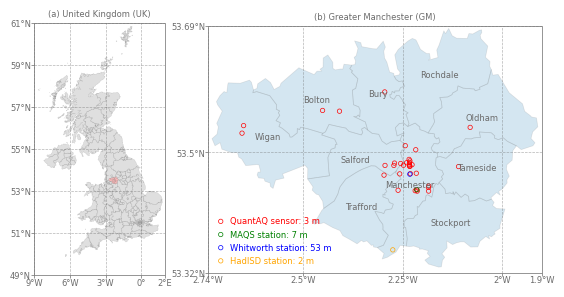

In [5]:
# Create the figure and axes using subplots with specific width ratios
fig, axs = plt.subplots(1, 2, figsize=(5.5, 2.8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 2.5]})

# First subplot (narrower)
gdf_platecarree.plot(ax=axs[0], color=gdf_platecarree['color'], alpha = alpha/2, edgecolor=labelcolor, linewidth = linewidth/2)
gdf_greater_manchester.plot(ax=axs[1], color=lc0, alpha = alpha/3, edgecolor=labelcolor, linewidth = linewidth)

for i in range(2):
    #size_bar = AnchoredSizeBar(axs[i].transData, size_bar_length_list[i], size_bar_lengend_list[i], loc='lower right', pad=0.1, color=labelcolor, frameon=False, size_vertical=0.001, fontproperties={'size': fontsize})
    #axs[i].add_artist(size_bar)
    axs[i].set_title(title_list[i], fontsize=fontsize,color=labelcolor, pad = padding)
    extent = extent_list[i]
    axs[i].set_extent(extent)
    if i ==0:
        axs[i].set_xticks([-9, -6, -3, 0, 2], crs = proj)
        axs[i].set_yticks([49, 51, 53, 55, 57, 59, 61], crs = proj) 
        axs[i].set_ylim(49, 61)
        axs[i].set_xlim(-9, 2)
    else:
        axs[i].set_xticks([-2.74, -2.5, -2.25, -2, -1.9], crs = proj)
        axs[i].set_yticks([53.32, 53.5, 53.69], crs = proj) 
        axs[i].set_xlim(-2.74, -1.9)
        axs[i].set_ylim(53.32, 53.69)
        for idx, row in gdf_greater_manchester.iterrows():
            axs[i].text(row.geometry.centroid.x, row.geometry.centroid.y, row['CTYUA23NM'], 
                        fontsize=fontsize, ha='center', va='center', color=labelcolor, 
                        transform=ccrs.PlateCarree())
        scatter1 = axs[i].scatter(df_meta['lon'], df_meta['lat'], edgecolor='red', color='none', marker='o', s=10,linewidth = linewidth, transform=ccrs.PlateCarree(),label='QuantAQ sensor: 3 m')    
        scatter2 = axs[i].scatter(-2.214472, 53.444216, edgecolor='green', color='none', marker='o', s=10,linewidth = linewidth, transform=ccrs.PlateCarree(),label='MAQS station: 7 m') # super site
        scatter3 = axs[i].scatter(-2.23207, 53.46743, edgecolor='blue', color='none', marker='o', s=10,linewidth = linewidth, transform=ccrs.PlateCarree(), label='Whitworth station: 53 m') 
        scatter4 = axs[i].scatter(-2.275, 53.354, edgecolor='orange', color='none', marker='o', s=10,linewidth = linewidth, transform=ccrs.PlateCarree(), label='HadISD station: 2 m')
        axs2_legend = axs[i].legend(loc='lower left', frameon=False, handletextpad=handletextpad, handlelength=1.2, fontsize=fontsize, ncol=1)
        for j, text in enumerate(axs2_legend.get_texts()):
            text.set_color(['red', 'green', 'blue', 'orange'][j]) 
           
    axs[i].tick_params(axis='both', labelsize=labelsize, length=2, pad =0.1, width = boundarywidth,colors=labelcolor)
    axs[i].grid('both', linewidth=linewidth, color=labelcolor, alpha=alpha, linestyle='--')
    axs[i].xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    axs[i].yaxis.set_major_formatter(LatitudeFormatter())
    for spine in axs[i].spines.values():
        spine.set_color(labelcolor)
        spine.set_linewidth(xwidth)

plt.subplots_adjust(left=0.05, right=0.975, bottom=0.05, top=0.95, wspace=0.18)         
# Show the figure
fig.savefig(output_dir + 'map.png', dpi=300)  
fig.savefig(output_dir + 'map.pdf', dpi=600) 

# extent of Greater manchester

In [6]:
gdf_greater_manchester

,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,color
63,E08000001,Bolton,None,368352,409874,-2.47952,53.5845,4f51bff2-9351-4e50-8ad2-4eb3605fd527,"POLYGON ((-2.42585 53.62586, -2.41993 53.62361...",#006bac
64,E08000002,Bury,None,379658,410767,-2.30880,53.5931,69b4729a-2521-4678-9e67-6b63359d1d84,"POLYGON ((-2.32530 53.65541, -2.31558 53.65506...",#006bac
65,E08000003,Manchester,None,384591,397063,-2.23359,53.4701,9b73368e-dc66-4b8c-bbb5-41d0fb859e09,"POLYGON ((-2.24802 53.54416, -2.23723 53.53886...",#006bac
66,E08000004,Oldham,None,396603,406784,-2.05274,53.5577,28bf188d-a4c3-4bdd-bc4e-392a27dc3614,"POLYGON ((-2.02682 53.62417, -2.02304 53.61584...",#006bac
67,E08000005,Rochdale,None,390315,412326,-2.14784,53.6074,37e541d6-f338-46b8-95fd-fd37b863da80,"POLYGON ((-2.13413 53.68573, -2.12539 53.67484...",#006bac
68,E08000006,Salford,None,374556,398128,-2.38485,53.4793,797af511-bd87-4075-97e0-10eda927a11c,"POLYGON ((-2.38538 53.53152, -2.35439 53.52624...",#006bac
69,E08000007,Stockport,None,391807,388258,-2.12465,53.3911,1bb38689-3162-44aa-b39a-e84aecabc2b1,"POLYGON ((-2.15845 53.45494, -2.14342 53.44486...",#006bac
70,E08000008,Tameside,None,394987,397995,-2.07700,53.4787,ec3824b7-9f1e-4624-85af-b28eac080b05,"POLYGON ((-2.01809 53.52483, -2.01878 53.52143...",#006bac
71,E08000009,Trafford,None,375790,391163,-2.36572,53.4167,da30acaf-5b96-4d31-be89-ed21c838ce12,"POLYGON ((-2.30440 53.47310, -2.28126 53.46486...",#006bac
72,E08000010,Wigan,None,362139,402126,-2.57242,53.5145,86d2dd5d-d4ed-494d-9482-45affb81da44,"POLYGON ((-2.63128 53.60522, -2.62594 53.59370...",#006bac


In [2]:
extent = gdf_greater_manchester.total_bounds
print("Extent of the outer square:", extent)

# [-2.73041783 53.32818953 -1.90962102 53.685734  ]

NameError: name 'gdf_greater_manchester' is not defined

In [5]:
# [-2.8, 53.3, -1.9, 53.7] for ERA5 (0.1°)
# [-2.74, 53.32, -1.9, 53.69] for 0.01°, 
print((2.74 -1.9) / 0.01, (53.69 - 53.32) / 0.01, ((2.74 -1.9) / 0.01) * ((53.69 - 53.32) / 0.01))

84.00000000000003 36.999999999999744 3107.9999999999795
